# Chapter 12: Testing and Debugging in Polars

## Debugging chained operations

### How it works...

In [23]:
import polars as pl

In [24]:
lf = pl.scan_csv('../data/pokemon.csv')

In [25]:
lf.fetch(5)

#,Name,Type 1,Type 2,Total,HP,…,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
i64,str,str,str,i64,i64,…,i64,i64,i64,i64,i64,bool
1,"""Bulbasaur""","""Grass""","""Poison""",318,45,…,49,65,65,45,1,false
2,"""Ivysaur""","""Grass""","""Poison""",405,60,…,63,80,80,60,1,false
3,"""Venusaur""","""Grass""","""Poison""",525,80,…,83,100,100,80,1,false
3,"""VenusaurMega V…","""Grass""","""Poison""",625,80,…,123,122,120,80,1,false
4,"""Charmander""","""Fire""",null,309,39,…,43,60,50,65,1,false


In [26]:
(
    lf
    .with_columns(
        pl.col('Attack').rank(method='dense').alias('Atk Rank'),
        pl.col('Defense').rank(method='dense').alias('Def Rank'),
        pl.col('Speed').rank(method='dense').alias('Spe Rank'),
    )
    .select(
        'Name',
        'Total',
        'Attack',
        'Defense',
        'Speed',
        pl.col('^*Rank$')
    )
    .sort('Total')
    .head()
    .collect()
)

Name,Total,Attack,Defense,Speed,Atk Rank,Def Rank,Spe Rank
str,i64,i64,i64,i64,u32,u32,u32
"""Caterpie""",195,30,35,45,5,6,10
"""Weedle""",195,35,30,50,6,5,12
"""Magikarp""",200,10,55,80,2,16,27
"""Kakuna""",205,25,50,35,4,13,5
"""Metapod""",205,20,55,30,3,16,4


In [27]:
(
    lf
    .with_columns(
        pl.col('Attack').rank(method='dense').alias('Atk Rank'),
        pl.col('Defense').rank(method='dense').alias('Def Rank'),
        pl.col('Speed').rank(method='dense').alias('Spe Rank'),
    )
    .select(
        'Name',
        'Total',
        'Attack',
        'Deffense',
        'Speed',
        pl.col('^*Rank$')
    )
    .sort('Total')
    .head()
    .collect()
)

ColumnNotFoundError: Deffense

Error originated just after this operation:
 WITH_COLUMNS:
 [col("Attack").rank().alias("Atk Rank"), col("Defense").rank().alias("Def Rank"), col("Speed").rank().alias("Spe Rank")]

    Csv SCAN ../data/pokemon.csv
    PROJECT */13 COLUMNS

LogicalPlan had already failed with the above error; after failure, 1 additional operation was attempted on the LazyFrame

In [28]:
(
    lf
    .with_columns(
        pl.col('Attack').rank(method='dense').alias('Atk Rank'),
        pl.col('Defense').rank(method='dense').alias('Def Rank'),
        pl.col('Speed').rank(method='dense').alias('Spe Rank'),
    )
    # .select(
    #     'Name',
    #     'Total',
    #     'Attack',
    #     'Deffense',
    #     'Speed',
    #     pl.col('^*Rank$')
    # )
    .sort('Total')
    .head()
    .collect()
)

#,Name,Type 1,Type 2,Total,HP,…,Speed,Generation,Legendary,Atk Rank,Def Rank,Spe Rank
i64,str,str,str,i64,i64,…,i64,i64,bool,u32,u32,u32
10,"""Caterpie""","""Bug""",null,195,45,…,45,1,false,5,6,10
13,"""Weedle""","""Bug""","""Poison""",195,40,…,50,1,false,6,5,12
129,"""Magikarp""","""Water""",null,200,20,…,80,1,false,2,16,27
14,"""Kakuna""","""Bug""","""Poison""",205,45,…,35,1,false,4,13,5
11,"""Metapod""","""Bug""",null,205,50,…,30,1,false,3,16,4


In [29]:
(
    lf
    .collect()
    .with_columns(
        pl.col('Attack').rank(method='dense').alias('Atk Rank'),
        pl.col('Defense').rank(method='dense').alias('Def Rank'),
        pl.col('Speed').rank(method='dense').alias('Spe Rank'),
    )
    .select(
        'Name',
        'Total',
        'Attack',
        'Deffense',
        'Speed',
        pl.col('^*Rank$')
    )
    .sort('Total')
    .head()
)

ColumnNotFoundError: Deffense

Error originated just after this operation:
DF ["#", "Name", "Type 1", "Type 2"]; PROJECT */16 COLUMNS; SELECTION: "None"

### There is more...

In [30]:
def add_ranks(lf):
    return (
        lf
        .with_columns(
            pl.col('Attack').rank(method='dense').alias('Atk Rank'),
            pl.col('Defense').rank(method='dense').alias('Def Rank'),
            pl.col('Speed').rank(method='dense').alias('Spe Rank'),
        )
    )

def keep_cols(lf):
    return (
        lf
        .select(
            'Name',
            'Total',
            'Attack',
            'Defense',
            'Speed',
            pl.col('^*Rank$')
        )
    )

(
    lf
    .pipe(add_ranks)
    .pipe(keep_cols)
    .sort('Total')
    .head()
    .collect()
)

Name,Total,Attack,Defense,Speed,Atk Rank,Def Rank,Spe Rank
str,i64,i64,i64,i64,u32,u32,u32
"""Caterpie""",195,30,35,45,5,6,10
"""Weedle""",195,35,30,50,6,5,12
"""Magikarp""",200,10,55,80,2,16,27
"""Kakuna""",205,25,50,35,4,13,5
"""Metapod""",205,20,55,30,3,16,4


## Inspecting and optimizing the query plan

### How to do it...

In [31]:
def keep_grass_or_fire(lf):
    accepted_types = ['Grass', 'Fire']
    return (
        lf
        .filter(
            (pl.col('Type 1').is_in(accepted_types))
            | (pl.col('Type 2').is_in(accepted_types))
        )
    )

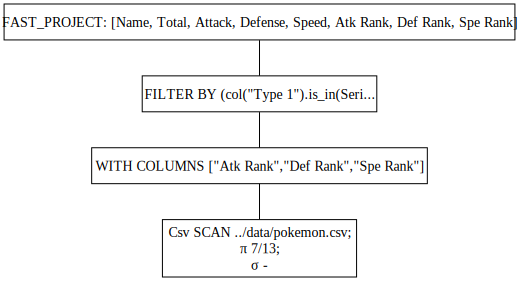

In [32]:
(
    lf
    .pipe(add_ranks)
    .pipe(keep_grass_or_fire)
    .pipe(keep_cols)
    .show_graph()
)

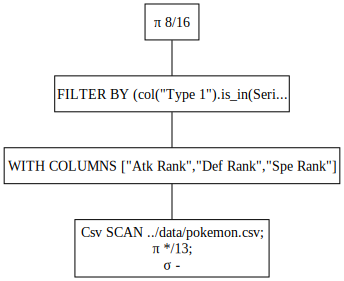

In [33]:
(
    lf
    .pipe(add_ranks)
    .pipe(keep_grass_or_fire)
    .pipe(keep_cols)
    .show_graph(optimized=False)
)

In [34]:
print(
    lf
    .pipe(add_ranks)
    .pipe(keep_grass_or_fire)
    .pipe(keep_cols)
    .explain()
)

FAST_PROJECT: [Name, Total, Attack, Defense, Speed, Atk Rank, Def Rank, Spe Rank]
  FILTER [(col("Type 1").is_in([Series])) | (col("Type 2").is_in([Series]))] FROM

   WITH_COLUMNS:
   [col("Attack").rank().alias("Atk Rank"), col("Defense").rank().alias("Def Rank"), col("Speed").rank().alias("Spe Rank")]

      Csv SCAN ../data/pokemon.csv
      PROJECT 7/13 COLUMNS


In [35]:
print(
    lf
    .pipe(add_ranks)
    .pipe(keep_grass_or_fire)
    .pipe(keep_cols)
    .explain(optimized=False)
)

 SELECT [col("Name"), col("Total"), col("Attack"), col("Defense"), col("Speed"), col("Atk Rank"), col("Def Rank"), col("Spe Rank")] FROM
  FILTER [(col("Type 1").is_in([Series])) | (col("Type 2").is_in([Series]))] FROM

   WITH_COLUMNS:
   [col("Attack").rank().alias("Atk Rank"), col("Defense").rank().alias("Def Rank"), col("Speed").rank().alias("Spe Rank")]

      Csv SCAN ../data/pokemon.csv
      PROJECT */13 COLUMNS


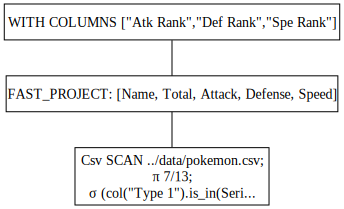

In [36]:
(
    lf
    .pipe(keep_grass_or_fire)
    .pipe(keep_cols)    
    .pipe(add_ranks)
    .show_graph()
)

### There is more...

/var/folders/4l/yz8bs9_14yj6_1v4hn7dh70h0000gn/T/ipykernel_72627/1552515462.py:6: UserWarning: Cannot combine 'streaming' with 'comm_subplan_elim'. CSE will be turned off.
  .show_graph(streaming=True)


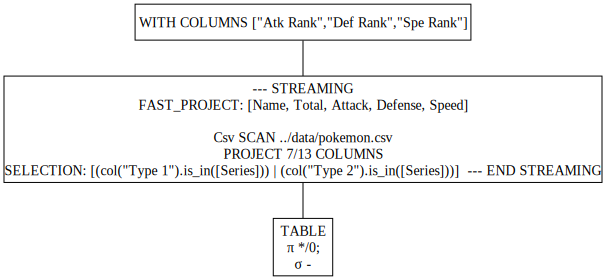

In [37]:
(
    lf
    .pipe(keep_grass_or_fire)
    .pipe(keep_cols)    
    .pipe(add_ranks)
    .show_graph(streaming=True)
)

## Testing data quality with cuallee

### How to do it...

In [38]:
from cuallee import Check, CheckLevel

In [39]:
df = lf.collect()
df.head()

#,Name,Type 1,Type 2,Total,HP,…,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
i64,str,str,str,i64,i64,…,i64,i64,i64,i64,i64,bool
1,"""Bulbasaur""","""Grass""","""Poison""",318,45,…,49,65,65,45,1,false
2,"""Ivysaur""","""Grass""","""Poison""",405,60,…,63,80,80,60,1,false
3,"""Venusaur""","""Grass""","""Poison""",525,80,…,83,100,100,80,1,false
3,"""VenusaurMega V…","""Grass""","""Poison""",625,80,…,123,122,120,80,1,false
4,"""Charmander""","""Fire""",null,309,39,…,43,60,50,65,1,false


In [40]:
check = Check(CheckLevel.WARNING, 'Completeness')
(
    check
    .is_complete('Name')
    .is_unique('Name')
    .validate(df)
)

id,timestamp,check,level,column,rule,value,rows,violations,pass_rate,pass_threshold,status
i64,str,str,str,str,str,str,i64,i64,f64,f64,str
1,"""2024-03-24 20:…","""Completeness""","""WARNING""","""Name""","""is_complete""","""N/A""",163,0,1.0,1.0,"""PASS"""
2,"""2024-03-24 20:…","""Completeness""","""WARNING""","""Name""","""is_unique""","""N/A""",163,0,1.0,1.0,"""PASS"""


In [41]:
check = Check(CheckLevel.WARNING, 'Accepted Values')
accepted_types = (
    lf.select('Type 1')
    .unique()
    .collect()
    .to_series()
    .to_list()
)

(
    check
    .is_contained_in('Type 1', set(accepted_types))
    .validate(df)
    .select('check', 'column', 'rule', 'status')
)

check,column,rule,status
str,str,str,str
"""Accepted Value…","""Type 1""","""is_contained_i…","""PASS"""


In [42]:
check = Check(CheckLevel.WARNING, 'Validation on Stats')
stats_cols = [
    'HP',
    'Attack',
    'Defense',
    'Sp. Atk',
    'Sp. Def',
    'Speed'
]
res_cols = [
    'check', 
    'column', 
    'rule', 
    'rows', 
    'violations', 
    'pass_rate', 
    'status'
]

(
    check
    .is_complete(stats_cols)
    .is_greater_than(stats_cols, 0)
    .validate(df)
    .select(res_cols)
)

check,column,rule,rows,violations,pass_rate,status
str,str,str,i64,i64,f64,str
"""Validation on …","""('HP', 'Attack…","""is_complete""",163,0,1.0,"""PASS"""
"""Validation on …","""('HP', 'Attack…","""is_greater_tha…",163,0,1.0,"""PASS"""


In [43]:
check = Check(CheckLevel.WARNING, 'Completeness')
cols = ['Name', 'Type 1', 'Type 2']
(
    check
    .are_complete(cols)
    .are_unique(cols)
    .validate(df)
    .select(
        'check', 
        'column', 
        'rule', 
        'rows', 
        'violations', 
        'pass_rate', 
        'status'
    )
)

check,column,rule,rows,violations,pass_rate,status
str,str,str,i64,f64,f64,str
"""Completeness""","""('Name', 'Type…","""are_complete""",163,28.666667,0.824131,"""FAIL"""
"""Completeness""","""('Name', 'Type…","""are_unique""",163,107.666667,0.339468,"""FAIL"""


### There is more...

In [44]:
check = Check(CheckLevel.WARNING, 'Completeness')
result = (
    check
    .is_complete('Type 2')
    .validate(df)
    .select('status')[0,0]=='PASS'
)
assert result

AssertionError: 

## Getting started with Pytest

Please refer to `demo.py` and `test_demo.py`